<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 3 - Phase 1 - eyamrog

This phase aims to compile the EL2AP corpus (Human-Authored Target Corpus).

- **Definition of text**:
    - Academic research articles;
    - Organised in sections: Abstract, Introduction, Literature Review, Methodology, Results, Discussion, Conclusion, Acknowledgements;
    - Paragraphs longer than or equal to 10 words.

## Required Python packages

- pandas
- nltk

## Importing the required libraries

In [1]:
import pandas as pd
import os
import sys
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import random

## Defining input variables

In [2]:
input_directory = 'cl_st3_ph1_eyamrog'
output_directory = 'cl_st3_ph1_eyamrog'

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory already exists.


### Import the data into a DataFrame

In [4]:
df_el2ap = pd.read_json(f'{input_directory}/scielo_chatgpt_erpp_pp.jsonl', lines=True)

In [5]:
df_el2ap.dtypes

Title                     object
URL                       object
Authors                   object
Published                 object
PDF Language              object
PDF URL                   object
Submitted                  int64
Posted                     int64
Text ID                   object
Area of Knowledge         object
Section                   object
Paragraph                 object
Text Paragraph            object
Text Paragraph ChatGPT    object
dtype: object

In [6]:
df_el2ap['Submitted'] = pd.to_datetime(df_el2ap['Submitted'], unit='ms')
df_el2ap['Posted'] = pd.to_datetime(df_el2ap['Posted'], unit='ms')

#### Renaming the column `Area of Knowledge` to `Discipline`

In [7]:
df_el2ap.rename(columns={
    'Area of Knowledge': 'Discipline'
}, inplace=True)

In [8]:
df_el2ap

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ..."
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex..."
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11522,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 14,"During the Zika epidemic, Brazil led the disco...","During the Zika epidemic, Brazil was the first..."
11523,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 15,Although Brazil is attempting to implement mea...,Although Brazil is implementing measures to re...
11524,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 16,"Regarding cultural differences, the use of mas...","With respect to cultural differences, the use ..."
11525,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/0

## Data Wrangling

### Paragraphs that could not be interpreted by ChatGPT

Those paragraphs are identified by the following ChatGPT responses:
- 'Of course. Please provide the passage **you would like me to improve**.'
- 'It appears that your message is incomplete. Please provide the passage **you would like me to improve**.'
- 'Certainly. Please provide the passage **you would like me to improve**.'
- 'Certainly! Please provide the passage **you would like me to improve**.'

In [9]:
# Get the indexes of rows containing the phrase 'you would like me to improve'
index_list_with_phrase = df_el2ap[df_el2ap['Text Paragraph ChatGPT'].str.contains('you would like me to improve', na=False)].index.tolist()

In [10]:
len(index_list_with_phrase)

20

In [11]:
print(index_list_with_phrase)

[3411, 3429, 4877, 5043, 5066, 5075, 6612, 6624, 6626, 6628, 6630, 6634, 6636, 6638, 6645, 6647, 7743, 7918, 8165, 10073]


### Paragraphs shorter than 10 words

In [12]:
# Slice the DataFrame where 'Text Paragraph' contains fewer than 10 words
df_less_than_10_words = df_el2ap[df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split())) < 10]

In [13]:
# Write the contents of the column 'Text Paragraph' to a text file
df_less_than_10_words['Text Paragraph'].to_csv(f"{output_directory}/df_less_than_10_words.txt", index=False, header=False)

In [14]:
# Get the indexes of rows where 'Text Paragraph' contains less than 10 words
index_list_less_than_10_words = df_el2ap[df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split())) < 10].index.tolist()

In [15]:
len(index_list_less_than_10_words)

391

### Consolidate an index list for filtering the DataFrame

In [16]:
# Merge the two lists, remove duplicates, and sort in descending order
index_list_for_filtering = sorted(set(index_list_with_phrase + index_list_less_than_10_words), reverse=True)

In [17]:
len(index_list_for_filtering)

391

### Dropping the filtered rows

In [18]:
df_el2ap.drop(index_list_for_filtering, inplace=True)

In [19]:
df_el2ap

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ..."
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex..."
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11522,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 14,"During the Zika epidemic, Brazil led the disco...","During the Zika epidemic, Brazil was the first..."
11523,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 15,Although Brazil is attempting to implement mea...,Although Brazil is implementing measures to re...
11524,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 16,"Regarding cultural differences, the use of mas...","With respect to cultural differences, the use ..."
11525,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/0

### Minimum and maximum paragraph lengths in the column `Text Paragraph`

In [20]:
# Calculate the length of each paragraph
paragraph_lengths = df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split()))

# Get the minimum and maximum lengths
min_length = paragraph_lengths.min()
max_length = paragraph_lengths.max()

# Display the results
min_length, max_length

(10, 503)

### Minimum and maximum paragraph lengths in the column `Text Paragraph ChatGPT`

In [21]:
# Calculate the length of each paragraph
paragraph_lengths_chatgpt = df_el2ap['Text Paragraph ChatGPT'].apply(lambda x: len(str(x).split()))

# Get the minimum and maximum lengths
min_length_chatgpt = paragraph_lengths.min()
max_length_chatgpt = paragraph_lengths.max()

# Display the results
min_length_chatgpt, max_length_chatgpt

(10, 503)

### Identifying characters that could be problematic for processing

#### In column `Text Paragraph`

In [22]:
# Combine all paragraphs into a single string
combined_text = ''.join(df_el2ap['Text Paragraph'].dropna())

# Get the set of unique characters
unique_characters = set(combined_text)

# Display the set of characters
print(unique_characters)

{'\uf05b', '𝑎', 'x', '±', '̃', '𝐴', 'ß', '£', 's', 'Š', '́', ',', '2', '0', '<', '𝑋', '𝑍', '𝑏', 'R', '𝜃', 'i', 'ω', '©', 'ż', 'F', '˜', '\uf06c', '\uf05d', 'm', '5', 'À', 'Ñ', '!', 'Ɣ', '8', 'G', 'ĩ', '>', 'θ', '\uf0a3', '𝑗', 'ć', 'W', '\uf0d2', '𝐼', '𝒇', '≠', '(', 'º', '≤', '⋅', '¸', '⋯', 'Ú', 'T', '&', 'ﬀ', '𝜑', '«', '𝑊', '𝐷', '𝑦', 'ñ', '𝑓', '“', 'ϒ', '.', '≥', 'ℛ', '[', 'κ', 'É', '∙', 'ê', 'ˆ', 'ũ', ';', '€', 'λ', '𝑣', '𝑥', '³', 'p', '°', '𝐺', 'w', 'μ', '𝑐', '•', 'e', 'b', 'α', 'ﬂ', '℃', '∼', '"', 'ï', '𝜏', '6', '𝑛', 'Ã', '…', 'â', '𝑘', '²', 'İ', 'Å', 'é', 'ε', '‒', 'n', 'V', '`', '®', '=', 'ø', '′', 'Í', 'u', '𝑒', '𝑡', 'j', 'g', '/', '∆', '1', '3', '𝑠', ' ', 'ǧ', '𝜇', 'o', '𝛼', 'h', 'ş', 'ı', '𝜌', 'M', '𝐵', 'ó', 'I', 'Ç', '̅', '¹', '𝒊', 'γ', 'φ', '❤', '∞', 'č', 'U', 'Ö', 'Ⓡ', 't', 'K', '𝑧', '𝜅', '#', ')', '\xad', 'a', '–', 'd', '𝑟', '\u200b', '●', 'y', 'X', ':', '‐', ']', '¨', '+', '𝑚', '𝛾', 'H', '™', 'ś', 'O', 'σ', 'ô', 'ﬁ', '𝑝', 'ğ', 'π', '𝑜', 'J', 'ë', 'S', 'Ć', 'f', '𝑃', '”', '

#### In column `Text Paragraph ChatGPT`

In [23]:
# Combine all paragraphs into a single string
combined_text_chatgpt = ''.join(df_el2ap['Text Paragraph ChatGPT'].dropna())

# Get the set of unique characters
unique_characters_chatgpt = set(combined_text)

# Display the set of characters
print(unique_characters_chatgpt)

{'\uf05b', '𝑎', 'x', '±', '̃', '𝐴', 'ß', '£', 's', 'Š', '́', ',', '2', '0', '<', '𝑋', '𝑍', '𝑏', 'R', '𝜃', 'i', 'ω', '©', 'ż', 'F', '˜', '\uf06c', '\uf05d', 'm', '5', 'À', 'Ñ', '!', 'Ɣ', '8', 'G', 'ĩ', '>', 'θ', '\uf0a3', '𝑗', 'ć', 'W', '\uf0d2', '𝐼', '𝒇', '≠', '(', 'º', '≤', '⋅', '¸', '⋯', 'Ú', 'T', '&', 'ﬀ', '𝜑', '«', '𝑊', '𝐷', '𝑦', 'ñ', '𝑓', '“', 'ϒ', '.', '≥', 'ℛ', '[', 'κ', 'É', '∙', 'ê', 'ˆ', 'ũ', ';', '€', 'λ', '𝑣', '𝑥', '³', 'p', '°', '𝐺', 'w', 'μ', '𝑐', '•', 'e', 'b', 'α', 'ﬂ', '℃', '∼', '"', 'ï', '𝜏', '6', '𝑛', 'Ã', '…', 'â', '𝑘', '²', 'İ', 'Å', 'é', 'ε', '‒', 'n', 'V', '`', '®', '=', 'ø', '′', 'Í', 'u', '𝑒', '𝑡', 'j', 'g', '/', '∆', '1', '3', '𝑠', ' ', 'ǧ', '𝜇', 'o', '𝛼', 'h', 'ş', 'ı', '𝜌', 'M', '𝐵', 'ó', 'I', 'Ç', '̅', '¹', '𝒊', 'γ', 'φ', '❤', '∞', 'č', 'U', 'Ö', 'Ⓡ', 't', 'K', '𝑧', '𝜅', '#', ')', '\xad', 'a', '–', 'd', '𝑟', '\u200b', '●', 'y', 'X', ':', '‐', ']', '¨', '+', '𝑚', '𝛾', 'H', '™', 'ś', 'O', 'σ', 'ô', 'ﬁ', '𝑝', 'ğ', 'π', '𝑜', 'J', 'ë', 'S', 'Ć', 'f', '𝑃', '”', '

### Export to a file

In [24]:
df_el2ap.to_json(f"{output_directory}/df_el2ap.jsonl", orient='records', lines=True)

In [25]:
df_el2ap.to_excel(f"{output_directory}/df_el2ap.xlsx")

## Balance the corpus

### Balance the `Discipline` stratum

In [26]:
# Group by 'Discipline' and calculate the required metrics
df_balancing = df_el2ap.groupby('Discipline').agg(
    Text_Counts=('Text ID', lambda x: x.nunique()),  # Count unique Text IDs
    Paragraph_Counts=('Text ID', 'size')  # Count number of paragraphs (rows)
).reset_index()

# Rename the columns
df_balancing.rename(columns={
    'Text_Counts': 'Text Counts',
    'Paragraph_Counts': 'Paragraph Counts'
}, inplace=True)

# Sort the DataFrame by 'Paragraph Counts' in descending order
df_balancing = df_balancing.sort_values(by='Paragraph Counts', ascending=False).reset_index(drop=True)

# Add 'Average Paragraph Count per Text'
df_balancing['Average Paragraph Count per Text'] = df_balancing['Paragraph Counts'] / df_balancing['Text Counts']

# Add 'Balanced Paragraph Counts' using direct computation with the index
df_balancing['Balanced Paragraph Counts'] = df_balancing['Paragraph Counts'] * (df_balancing.index + 1)

# Display the DataFrame
df_balancing

,Discipline,Text Counts,Paragraph Counts,Average Paragraph Count per Text,Balanced Paragraph Counts
0,Health Sciences,186,5431,29.198925,5431
1,Biological Sciences,50,1492,29.840000,2984
2,Human Sciences,27,1283,47.518519,3849
3,Applied Social Sciences,24,1272,53.000000,5088
4,"Linguistic, literature and arts",15,1030,68.666667,5150
5,Exact and Earth Sciences,5,300,60.000000,1800
6,Engineering,6,213,35.500000,1491
7,Agricultural Sciences,3,115,38.333333,920


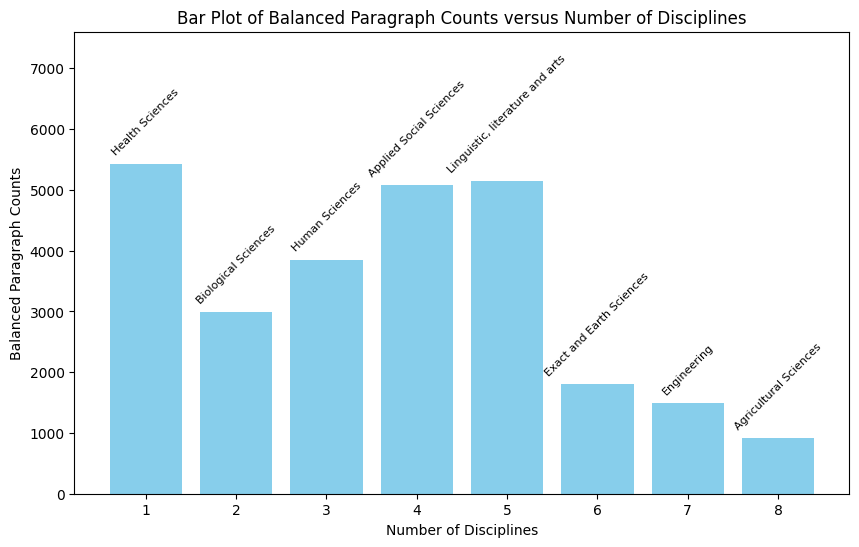

In [27]:
import matplotlib.pyplot as plt

# X-axis: Index + 1
x_axis = df_balancing.index + 1

# Y-axis: Balanced Paragraph Counts
y_axis = df_balancing['Balanced Paragraph Counts']

# Disciplines for labels
labels = df_balancing['Discipline']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='skyblue')

# Adjust the y-axis range
plt.ylim(0, y_axis.max() * 1.4)  # Extend y-axis to 40% above the maximum value

# Adding labels and title
plt.xlabel('Number of Disciplines')
plt.ylabel('Balanced Paragraph Counts')
plt.title('Bar Plot of Balanced Paragraph Counts versus Number of Disciplines')
plt.xticks(x_axis)  # Ensure all indices are shown

# Adding the labels for each bar
for i, label in enumerate(labels):
    plt.text(x=x_axis[i], y=y_axis[i] + (y_axis.max() * 0.02), s=label, ha='center', va='bottom', fontsize=8, rotation=45)

# Show the plot
plt.show()

Ideally, the corpus should be balanced according to the discipline contributing the least with paragraphs. However, if the least contributing discipline, `Agricultural Sciences`, is considered, the number of disciplines will be maintained, but the number of paragraphs of the corpus will be the lowest. The proposed solution consists of excluding the least contributing disciplines: `Engineering`, `Exact and Earth Sciences` and `Agricultural Sciences`. Balancing the corpus with the number of paragraphs of `Linguistic, literature and arts` results in the largest number of paragraphs with the least reduction in the number of disciplines.

In [28]:
# Exclude rows based on the specified values in the 'Discipline' column
df_el2ap_balanced = df_el2ap[~df_el2ap['Discipline'].isin(['Engineering', 'Exact and Earth Sciences', 'Agricultural Sciences'])]

# Display the new DataFrame
df_el2ap_balanced

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ..."
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex..."
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11522,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 14,"During the Zika epidemic, Brazil led the disco...","During the Zika epidemic, Brazil was the first..."
11523,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 15,Although Brazil is attempting to implement mea...,Although Brazil is implementing measures to re...
11524,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/08/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-06,2020-04-08,t000315,Health Sciences,"Literature Review, Methodology, Results, Discu...",Paragraph 16,"Regarding cultural differences, the use of mas...","With respect to cultural differences, the use ..."
11525,COVID-19 in Brazil: advantages of a socialized...,https://preprints.scielo.org/index.php/scielo/...,"Julio Croda, Wanderson Kleber de Oliveira, Ro...",Submitted 04/06/2020 - Posted 04/0

### Balance the `Section`stratum

#### Inspect the sections by discipline

In [29]:
# List of disciplines
discipline = [
    'Health Sciences',
    'Biological Sciences',
    'Human Sciences',
    'Applied Social Sciences',
    'Linguistic, literature and arts'
]

# Create an empty dictionary to store unique sections for each discipline
unique_sections_by_discipline = {}

# Iterate through the disciplines
for d in discipline:
    # Slice the DataFrame based on the current discipline
    discipline_slice = df_el2ap[df_el2ap['Discipline'] == d]
    
    # Get unique sections, sorted in decreasing order
    unique_sections = sorted(discipline_slice['Section'].dropna().unique())
    
    # Store the result in the dictionary
    unique_sections_by_discipline[d] = unique_sections

# Display unique sections for each discipline
unique_sections_by_discipline

{'Health Sciences': ['Abstract',
  'Acknowledgements',
  'Conclusion',
  'Discussion',
  'Discussion, Conclusion',
  'Introduction',
  'Introduction, Literature Review',
  'Introduction, Literature Review, Methodology',
  'Introduction, Literature Review, Methodology, Results',
  'Introduction, Literature Review, Methodology, Results, Discussion',
  'Introduction, Literature Review, Methodology, Results, Discussion, Conclusion',
  'Literature Review',
  'Literature Review, Methodology',
  'Literature Review, Methodology, Results',
  'Literature Review, Methodology, Results, Discussion',
  'Literature Review, Methodology, Results, Discussion, Conclusion',
  'Methodology',
  'Methodology, Results',
  'Methodology, Results, Discussion',
  'Methodology, Results, Discussion, Conclusion',
  'Results',
  'Results, Discussion',
  'Results, Discussion, Conclusion'],
 'Biological Sciences': ['Abstract',
  'Acknowledgements',
  'Conclusion',
  'Discussion',
  'Discussion, Conclusion',
  'Introduc

All of the sections in the `Linguistic, literature and arts` discipline are present in the other disciplines. The proposed strategy consists of aligning the patterns of sections in the `Linguistic, literature and arts` discipline with other disciplines by removing the diverging patterns in the `non_standard_articles` list.

The diverging patterns consist of non-standardly organised articles:
- `Introduction, Literature Review, Methodology, Results`: Texts that do not present a clear `Introduction` and conclude with a `Conclusion`;
- `Introduction, Literature Review, Methodology, Results, Discussion, Conclusion`: Texts that consist of a single piece of text;
- `Literature Review, Methodology, Results, Discussion, Conclusion`: Texts presenting a clear `Introduction` followed by a continuous text.

#### Inspect the non-standard texts by discipline

In [30]:
# Define the list of non-standard texts
non_standard_texts = [
    'Introduction, Literature Review, Methodology, Results',
    'Introduction, Literature Review, Methodology, Results, Discussion, Conclusion',
    'Literature Review, Methodology, Results, Discussion, Conclusion'
]

# Initialise an empty dictionary to store results by discipline
non_standard_by_discipline = {}

# Iterate through each unique discipline
for discipline in df_el2ap_balanced['Discipline'].unique():
    # Filter rows for the current discipline
    discipline_slice = df_el2ap_balanced[df_el2ap_balanced['Discipline'] == discipline]
    
    # Initialise a sub-dictionary for the current discipline
    non_standard_by_discipline[discipline] = {}
    
    # Iterate through the non-standard articles list
    for section in non_standard_texts:
        # Slice the DataFrame for the current section
        section_slice = discipline_slice[discipline_slice['Section'] == section]
        
        # Get unique Text IDs, sorted in increasing order
        unique_text_ids = sorted(section_slice['Text ID'].dropna().unique())
        
        # Add the result to the sub-dictionary
        non_standard_by_discipline[discipline][section] = unique_text_ids

# Display the results
non_standard_by_discipline

{'Biological Sciences': {'Introduction, Literature Review, Methodology, Results': [],
  'Introduction, Literature Review, Methodology, Results, Discussion, Conclusion': ['t000124',
   't000169',
   't000174',
   't000292'],
  'Literature Review, Methodology, Results, Discussion, Conclusion': []},
 'Applied Social Sciences': {'Introduction, Literature Review, Methodology, Results': ['t000074'],
  'Introduction, Literature Review, Methodology, Results, Discussion, Conclusion': ['t000260'],
  'Literature Review, Methodology, Results, Discussion, Conclusion': ['t000278']},
 'Linguistic, literature and arts': {'Introduction, Literature Review, Methodology, Results': [],
  'Introduction, Literature Review, Methodology, Results, Discussion, Conclusion': [],
  'Literature Review, Methodology, Results, Discussion, Conclusion': []},
 'Health Sciences': {'Introduction, Literature Review, Methodology, Results': ['t000268'],
  'Introduction, Literature Review, Methodology, Results, Discussion, Conc

The texts with diverging patterns are more frequently found in the `Health Sciences` discipline. Even so, they are not so frequent compared to the whole corpus. Therefore, it is safe to exclude them.

#### Exclude the non-standard texts

In [31]:
# Initialise an empty set to store unique Text IDs
consolidated_text_ids = set()

# Iterate through the dictionary
for discipline, sections in non_standard_by_discipline.items():
    for section, text_ids in sections.items():
        # Add the Text IDs from the current section to the set
        consolidated_text_ids.update(text_ids)

# Convert the set to a sorted list in decreasing order
sorted_consolidated_text_ids = sorted(consolidated_text_ids)

# Display the result
sorted_consolidated_text_ids

['t000029',
 't000074',
 't000124',
 't000157',
 't000169',
 't000174',
 't000185',
 't000192',
 't000195',
 't000199',
 't000207',
 't000210',
 't000212',
 't000213',
 't000214',
 't000216',
 't000217',
 't000218',
 't000221',
 't000222',
 't000223',
 't000226',
 't000228',
 't000229',
 't000231',
 't000234',
 't000237',
 't000238',
 't000239',
 't000240',
 't000241',
 't000243',
 't000244',
 't000247',
 't000251',
 't000253',
 't000255',
 't000256',
 't000257',
 't000258',
 't000260',
 't000262',
 't000267',
 't000268',
 't000276',
 't000277',
 't000278',
 't000280',
 't000282',
 't000291',
 't000292',
 't000295',
 't000300',
 't000301',
 't000302',
 't000306',
 't000307',
 't000308',
 't000310',
 't000311',
 't000312',
 't000315']

In [32]:
# Drop rows where 'Text ID' is in the 'sorted_consolidated_text_ids' list
df_el2ap_balanced = df_el2ap_balanced[~df_el2ap_balanced['Text ID'].isin(sorted_consolidated_text_ids)]

# Display the filtered DataFrame
df_el2ap_balanced

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ..."
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex..."
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11500,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 5,The following is the complete genome analysis ...,The following section presents a comprehensive...
11501,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 6,"In this string size, Gene S (start) and Gene O...","Within this sequence length, both Gene S (star..."
11502,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 7,When calculating with a length interval of 28 ...,When using a length interval of 28 nucleotides...
11503,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,Conclusion,Paragraph 1,"During the analysis Gene S, Gene N and ORF10 w...","During the analysis, Gene 

#### Reassess the balance

In [33]:
# Group by 'Discipline' and calculate the required metrics
df_balancing = df_el2ap_balanced.groupby('Discipline').agg(
    Text_Counts=('Text ID', lambda x: x.nunique()),  # Count unique Text IDs
    Paragraph_Counts=('Text ID', 'size')  # Count number of paragraphs (rows)
).reset_index()

# Rename the columns
df_balancing.rename(columns={
    'Text_Counts': 'Text Counts',
    'Paragraph_Counts': 'Paragraph Counts'
}, inplace=True)

# Sort the DataFrame by 'Paragraph Counts' in descending order
df_balancing = df_balancing.sort_values(by='Paragraph Counts', ascending=False).reset_index(drop=True)

# Add 'Average Paragraph Count per Text'
df_balancing['Average Paragraph Count per Text'] = df_balancing['Paragraph Counts'] / df_balancing['Text Counts']

# Add 'Balanced Paragraph Counts' using direct computation with the index
df_balancing['Balanced Paragraph Counts'] = df_balancing['Paragraph Counts'] * (df_balancing.index + 1)

# Display the DataFrame
df_balancing

,Discipline,Text Counts,Paragraph Counts,Average Paragraph Count per Text,Balanced Paragraph Counts
0,Health Sciences,132,4624,35.030303,4624
1,Biological Sciences,46,1454,31.608696,2908
2,Human Sciences,26,1269,48.807692,3807
3,Applied Social Sciences,21,1231,58.619048,4924
4,"Linguistic, literature and arts",15,1030,68.666667,5150


`Health Sciences` still stands out. Therefore, the number of `Health Sciences` texts should be reduced. Since `Health Sciences` has an average paragraph count per text similar to `Biological Sciences`, the proposed solution is reducing the number of `Health Sciences` texts to 45.

#### Inspect the number of paragraphs per section per discipline

In [34]:
# Group by 'Discipline' and 'Section' to count the number of paragraphs
df_section_paragraph = df_el2ap_balanced.groupby(['Discipline', 'Section']).size().reset_index(name='Paragraph Count')

# Display the resulting DataFrame
df_section_paragraph

,Discipline,Section,Paragraph Count
0,Applied Social Sciences,Abstract,28
1,Applied Social Sciences,Acknowledgements,9
2,Applied Social Sciences,Conclusion,94
3,Applied Social Sciences,Discussion,31
4,Applied Social Sciences,"Discussion, Conclusion",7
...,...,...,...
70,"Linguistic, literature and arts","Literature Review, Methodology, Results, Discu...",197
71,"Linguistic, literature and arts",Methodology,43
72,"Linguistic, literature and arts","Methodology, Results, Discussion",168
73,"Linguistic, literature and arts",Results,46


In [35]:
df_section_paragraph.to_excel(f"{output_directory}/df_section_paragraph.xlsx")

#### Inspect the top `Health Sciences` texts in terms of number of paragraphs

In [36]:
# Filter rows where 'Discipline' is 'Health Sciences'
health_sciences_slice = df_el2ap_balanced[df_el2ap_balanced['Discipline'] == 'Health Sciences']

# Group by 'Text ID' and count the number of paragraphs
df_top_health_sciences = health_sciences_slice.groupby('Text ID').size().reset_index(name='Paragraph Count')

# Sort by 'Paragraph Count' in descending order
df_top_health_sciences = df_top_health_sciences.sort_values(by='Paragraph Count', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
df_top_health_sciences

,Text ID,Paragraph Count
0,t000013,96
1,t000025,84
2,t000133,80
3,t000105,69
4,t000030,68
...,...,...
127,t000180,13
128,t000273,12
129,t000235,10
130,t000296,6


##### Export to a file

In [37]:
df_top_health_sciences.to_excel(f"{output_directory}/df_top_health_sciences.xlsx")

#### Randomly select 45 `Health Sciences` texts to be retained

In [38]:
# Ensure 'Text ID' column has enough unique items
if len(df_top_health_sciences['Text ID'].unique()) >= 45:
    # Generate a random sample of 45 'Text ID's
    random_text_ids = random.sample(list(df_top_health_sciences['Text ID'].unique()), 45)
else:
    print("Not enough unique 'Text ID' values to sample 45 items.")

# Display the random sample
random_text_ids

['t000305',
 't000235',
 't000193',
 't000204',
 't000091',
 't000299',
 't000274',
 't000275',
 't000189',
 't000083',
 't000288',
 't000105',
 't000285',
 't000135',
 't000294',
 't000198',
 't000040',
 't000095',
 't000273',
 't000211',
 't000171',
 't000250',
 't000063',
 't000272',
 't000177',
 't000200',
 't000121',
 't000154',
 't000309',
 't000043',
 't000246',
 't000283',
 't000203',
 't000025',
 't000271',
 't000092',
 't000109',
 't000141',
 't000097',
 't000116',
 't000287',
 't000188',
 't000035',
 't000293',
 't000115']

#### Build the list of exclusion of `Health Sciences` texts

In [39]:
# Get all 'Text ID' values from the 'df_top_health_sciences' DataFrame
all_text_ids = df_top_health_sciences['Text ID'].unique()

# Identify 'Text ID' values to be excluded
excluded_text_ids = [text_id for text_id in all_text_ids if text_id not in random_text_ids]

# Display the list of 'Text ID's to be excluded
#excluded_text_ids

#### Exclude the `Health Sciences` texts

In [40]:
# Exclude rows where 'Text ID' is in the 'excluded_text_ids' list
df_el2ap_balanced = df_el2ap_balanced[~df_el2ap_balanced['Text ID'].isin(excluded_text_ids)]

# Display the resulting DataFrame
#df_el2ap_balanced

#### Reassess the balance

In [41]:
# Group by 'Discipline' and calculate the required metrics
df_balancing = df_el2ap_balanced.groupby('Discipline').agg(
    Text_Counts=('Text ID', lambda x: x.nunique()),  # Count unique Text IDs
    Paragraph_Counts=('Text ID', 'size')  # Count number of paragraphs (rows)
).reset_index()

# Rename the columns
df_balancing.rename(columns={
    'Text_Counts': 'Text Counts',
    'Paragraph_Counts': 'Paragraph Counts'
}, inplace=True)

# Sort the DataFrame by 'Paragraph Counts' in descending order
df_balancing = df_balancing.sort_values(by='Paragraph Counts', ascending=False).reset_index(drop=True)

# Add 'Average Paragraph Count per Text'
df_balancing['Average Paragraph Count per Text'] = df_balancing['Paragraph Counts'] / df_balancing['Text Counts']

# Add 'Balanced Paragraph Counts' using direct computation with the index
df_balancing['Balanced Paragraph Counts'] = df_balancing['Paragraph Counts'] * (df_balancing.index + 1)

# Display the DataFrame
df_balancing

,Discipline,Text Counts,Paragraph Counts,Average Paragraph Count per Text,Balanced Paragraph Counts
0,Health Sciences,45,1684,37.422222,1684
1,Biological Sciences,46,1454,31.608696,2908
2,Human Sciences,26,1269,48.807692,3807
3,Applied Social Sciences,21,1231,58.619048,4924
4,"Linguistic, literature and arts",15,1030,68.666667,5150


In [42]:
# Group by 'Discipline' and 'Section' to count the number of paragraphs
df_section_paragraph = df_el2ap_balanced.groupby(['Discipline', 'Section']).size().reset_index(name='Paragraph Count')

# Display the resulting DataFrame
df_section_paragraph

,Discipline,Section,Paragraph Count
0,Applied Social Sciences,Abstract,28
1,Applied Social Sciences,Acknowledgements,9
2,Applied Social Sciences,Conclusion,94
3,Applied Social Sciences,Discussion,31
4,Applied Social Sciences,"Discussion, Conclusion",7
...,...,...,...
65,"Linguistic, literature and arts","Literature Review, Methodology, Results, Discu...",197
66,"Linguistic, literature and arts",Methodology,43
67,"Linguistic, literature and arts","Methodology, Results, Discussion",168
68,"Linguistic, literature and arts",Results,46


In [43]:
# Filter rows where 'Discipline' is 'Health Sciences'
health_sciences_slice = df_el2ap_balanced[df_el2ap_balanced['Discipline'] == 'Health Sciences']

# Group by 'Text ID' and count the number of paragraphs
df_top_health_sciences = health_sciences_slice.groupby('Text ID').size().reset_index(name='Paragraph Count')

# Sort by 'Paragraph Count' in descending order
df_top_health_sciences = df_top_health_sciences.sort_values(by='Paragraph Count', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
df_top_health_sciences

,Text ID,Paragraph Count
0,t000025,84
1,t000105,69
2,t000109,63
3,t000177,60
4,t000193,57
5,t000097,55
6,t000035,51
7,t000211,49
8,t000091,48
9,t000204,47


##### Export to a file

In [44]:
df_section_paragraph.to_excel(f"{output_directory}/df_section_paragraph2.xlsx")

## Finalised `EL2AP` and `AI-EL2AP` corpora

**Important**: Due to the random component that was introduced, the corpus changes every time this notebook is reprocessed.

In [45]:
df_el2ap_balanced

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ..."
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex..."
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11500,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 5,The following is the complete genome analysis ...,The following section presents a comprehensive...
11501,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 6,"In this string size, Gene S (start) and Gene O...","Within this sequence length, both Gene S (star..."
11502,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 7,When calculating with a length interval of 28 ...,When using a length interval of 28 nucleotides...
11503,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,Conclusion,Paragraph 1,"During the analysis Gene S, Gene N and ORF10 w...","During the analysis, Gene 

### Create the column `Section Code`

In [5]:
# Create a list of sections sorted in increasing order
section_list = sorted(df_el2ap_balanced['Section'].dropna().unique())

# Create the dictionary with scheme 's1', 's2', etc.
section_dict = {f's{i+1}': section for i, section in enumerate(section_list)}

# Display the dictionary
section_dict

{'s1': 'Abstract',
 's2': 'Acknowledgements',
 's3': 'Comments to the Editor',
 's4': 'Conclusion',
 's5': 'Discussion',
 's6': 'Discussion, Conclusion',
 's7': 'Introduction',
 's8': 'Introduction, Literature Review',
 's9': 'Introduction, Literature Review, Methodology',
 's10': 'Introduction, Literature Review, Methodology, Results, Discussion',
 's11': 'Literature Review',
 's12': 'Literature Review, Methodology, Results',
 's13': 'Literature Review, Methodology, Results, Discussion',
 's14': 'Methodology',
 's15': 'Methodology, Results',
 's16': 'Methodology, Results, Discussion',
 's17': 'Methodology, Results, Discussion,',
 's18': 'Methodology, Results, Discussion, Conclusion',
 's19': 'Results',
 's20': 'Results, Discussion',
 's21': 'Results, Discussion, Conclusion'}

In [6]:
# Reverse the dictionary: swap keys and values
reversed_section_dict = {value: key for key, value in section_dict.items()}

# Create the 'Section Code' column based on the 'Section' column
df_el2ap_balanced['Section Code'] = df_el2ap_balanced['Section'].map(reversed_section_dict)

# Display the updated DataFrame
df_el2ap_balanced

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT,Section Code
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...,s1
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...,s8
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ...",s8
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex...",s8
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns...",s8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 5,The following is the complete genome analysis ...,The following section presents a comprehensive...,s20
6664,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 6,"In this string size, Gene S (start) and Gene O...","Within this sequence length, both Gene S (star...",s20
6665,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 7,When calculating with a length interval of 28 ...,When using a length interval of 28 nucleotides...,s20
6666,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,Conclusion,Paragraph 1,"During the analysis Gene S, Gene N and

### Create the column `Paragraph Code`

In [7]:
# Create the 'Paragraph Code' column by extracting the numeric part and prepending 'p'
df_el2ap_balanced['Paragraph Code'] = df_el2ap_balanced['Paragraph'].apply(lambda x: f"p{''.join(filter(str.isdigit, str(x)))}")

# Display the updated DataFrame
df_el2ap_balanced

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text ID,Discipline,Section,Paragraph,Text Paragraph,Text Paragraph ChatGPT,Section Code,Paragraph Code
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,Abstract,Paragraph 1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",As part of an ongoing project focused on the f...,s1,p1
1,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 1,At the end of the era in which the plant Class...,At the end of the period when plant classifica...,s8,p1
2,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 2,Brazil is represented by Dennstaedtiaceae with...,"In Brazil, Dennstaedtiaceae is represented by ...",s8,p2
3,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 3,Pteridium is spread all across the globe (exce...,"Pteridium is distributed globally, with the ex...",s8,p3
4,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,t000000,Biological Sciences,"Introduction, Literature Review",Paragraph 4,"In the State of Minas Gerais, Dennstaedtiaceae...","In the state of Minas Gerais, the family Denns...",s8,p4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 5,The following is the complete genome analysis ...,The following section presents a comprehensive...,s20,p5
6664,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 6,"In this string size, Gene S (start) and Gene O...","Within this sequence length, both Gene S (star...",s20,p6
6665,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,"Results, Discussion",Paragraph 7,When calculating with a length interval of 28 ...,When using a length interval of 28 nucleotides...,s20,p7
6666,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,t000314,Biological Sciences,Conclusion,Paragrap

### Export to a file

In [8]:
df_el2ap_balanced.to_json(f"{output_directory}/df_el2ap_balanced.jsonl", orient='records', lines=True)

In [9]:
df_el2ap_balanced.to_excel(f"{output_directory}/df_el2ap_balanced.xlsx")

## Word Count

### Import the data into a DataFrame

In [3]:
df_el2ap_balanced = pd.read_json(f'{output_directory}/df_el2ap_balanced.jsonl', lines=True)

In [4]:
df_el2ap_balanced['Submitted'] = pd.to_datetime(df_el2ap_balanced['Submitted'], unit='ms')
df_el2ap_balanced['Posted'] = pd.to_datetime(df_el2ap_balanced['Posted'], unit='ms')

### Calculate word counts for columns `Text Paragraph` and `Text Paragraph ChatGPT`

In [50]:
# Download the required NLTK data (only if you haven't already)
nltk.download('punkt')

# Create the new column 'Text Paragraph Word Count'
df_el2ap_balanced['Text Paragraph Word Count'] = df_el2ap_balanced['Text Paragraph'].apply(lambda x: len(word_tokenize(str(x))))

# Create the new column 'Text Paragraph ChatGPT Word Count'
df_el2ap_balanced['Text Paragraph ChatGPT Word Count'] = df_el2ap_balanced['Text Paragraph ChatGPT'].apply(lambda x: len(word_tokenize(str(x))))

[nltk_data] Downloading package punkt to /home/eyamrog/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### `EL2AP` and `AI-EL2AP` corpora number of texts

In [51]:
# Calculate the number of unique values in the 'Text ID' column
num_unique_text_ids = df_el2ap_balanced['Text ID'].nunique()

# Display the result
num_unique_text_ids

153

### `EL2AP` and `AI-EL2AP` corpora number of paragraphs

In [52]:
df_el2ap_balanced.shape[0]

6668

### `EL2AP` corpus number of tokens

In [53]:
# Calculate the total number of words
total_word_count = df_el2ap_balanced['Text Paragraph Word Count'].sum()

# Display the total word count
total_word_count

746066

### `AI-EL2AP` corpus number of tokens

In [54]:
# Calculate the total number of words
total_word_count_chatgpt = df_el2ap_balanced['Text Paragraph ChatGPT Word Count'].sum()

# Display the total word count
total_word_count_chatgpt

747754

## Prepare data for tagging

### Import the data into a DataFrame

In [3]:
df_el2ap_balanced = pd.read_json(f'{output_directory}/df_el2ap_balanced.jsonl', lines=True)

In [4]:
df_el2ap_balanced['Submitted'] = pd.to_datetime(df_el2ap_balanced['Submitted'], unit='ms')
df_el2ap_balanced['Posted'] = pd.to_datetime(df_el2ap_balanced['Posted'], unit='ms')

### Prepare `EL2AP` data for tagging

- Export each paragraph in the column 'Text Paragraph' of the 'df_el2ap_balanced' DataFrame to individual text files;
- Introduce a '\n' every 10 words so that each file is organised in lines of 10 words;
- Organise the files into directories sequentially named 'el2ap_1', 'el2ap_2', etc., in the 'output_directory', with 1,000 files each.

In [5]:
# Counter for directories and files
dir_count = 1
file_count = 0

# Function to split text into lines of 10 words
def format_paragraph(text):
    words = text.split()  # Split the paragraph into words
    lines = [' '.join(words[i:i+10]) for i in range(0, len(words), 10)]  # Group words in chunks of 10
    return '\n'.join(lines)  # Join lines with a newline character

# Iterate through the DataFrame rows
for index, row in df_el2ap_balanced.iterrows():
    # Check if a new directory is needed
    if file_count % 1000 == 0:
        dir_name = f"{output_directory}/el2ap/el2ap_{dir_count}"
        os.makedirs(dir_name, exist_ok=True)  # Create the directory if it doesn't exist
        dir_count += 1

    # Generate the file name
    file_name = f"{dir_name}/{row['Text ID']}_{row['Section Code']}_{row['Paragraph Code']}_el2ap.txt"
    
    # Write the formatted paragraph to the file
    with open(file_name, 'w', encoding='utf-8') as file:
        formatted_paragraph = format_paragraph(str(row['Text Paragraph']))
        file.write(formatted_paragraph)
    
    # Increment the file counter
    file_count += 1

### Prepare `AI-EL2AP` data for tagging

In [6]:
# Counter for directories and files
dir_count = 1
file_count = 0

# Function to split text into lines of 10 words
def format_paragraph(text):
    words = text.split()  # Split the paragraph into words
    lines = [' '.join(words[i:i+10]) for i in range(0, len(words), 10)]  # Group words in chunks of 10
    return '\n'.join(lines)  # Join lines with a newline character

# Iterate through the DataFrame rows
for index, row in df_el2ap_balanced.iterrows():
    # Check if a new directory is needed
    if file_count % 1000 == 0:
        dir_name = f"{output_directory}/ai-el2ap/ai-el2ap_{dir_count}"
        os.makedirs(dir_name, exist_ok=True)  # Create the directory if it doesn't exist
        dir_count += 1

    # Generate the file name
    file_name = f"{dir_name}/{row['Text ID']}_{row['Section Code']}_{row['Paragraph Code']}_ai-el2ap.txt"
    
    # Write the formatted paragraph to the file
    with open(file_name, 'w', encoding='utf-8') as file:
        formatted_paragraph = format_paragraph(str(row['Text Paragraph ChatGPT']))
        file.write(formatted_paragraph)
    
    # Increment the file counter
    file_count += 1